<a href="https://colab.research.google.com/github/DavidV19/project_ML/blob/main/ML_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNeighborsClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Carga de datos (asegúrate de que el DataFrame se llame 'data')


In [ ]:
data = pd.read_excel('/content/datos_finales.xlsx')

In [ ]:
print(f"Total number of rows in the dataset: {len(data)}")
print(f"Number of features (columns): {data.shape[1]}")

Total number of rows in the dataset: 990
Number of features (columns): 9


Definir la variable objetivo (posible_fuga)


In [ ]:
data['posible_fuga'] = np.where(data['presupuesto'] > data['costo_servicio'], 1, 0)


data['cantidad_fuga'] = data['presupuesto'] - data['costo_servicio']

Seleccionar características relevantes


In [ ]:
features = ['EP_contratadas', 'presupuesto', 'nombre_EMOfertante', 'servicio_contratado', 'costo_servicio', 'cantidad_fuga']


Codificación de variables categóricas (si es necesario)


In [ ]:
data_encoded = pd.get_dummies(data[features])

División de datos en conjunto de entrenamiento y prueba


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data['posible_fuga'], test_size=0.2, random_state=42, stratify=data['posible_fuga'])


Definir las distancias y valores de k a probar


In [ ]:
distances = ['euclidean', 'manhattan', 'minkowski']
k_values = [1, 2, 3]

Inicializar variables para el mejor rendimiento


In [ ]:
best_accuracy = 0
best_distance = None
best_k = None
best_model = None

Crear un DataFrame para almacenar los resultados


In [ ]:
results_df = pd.DataFrame(columns=['Distance', 'K', 'Accuracy'])

Probar todas las combinaciones de distancias y valores de k

Probar todas las combinaciones de distancias y valores de k


In [ ]:
for distance in distances:
    for k_value in k_values:
        knn_model = KNeighborsClassifier(n_neighbors=k_value, metric=distance)
        knn_model.fit(X_train, y_train)

        y_pred = knn_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        # Actualizar el mejor rendimiento y modelo si es necesario
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_distance = distance
            best_k = k_value
            best_model = knn_model
        #Agregar resultados al DataFrame
        results_df = results_df.append({'Distance': distance, 'K': k_value, 'Accuracy': accuracy}, ignore_index=True)

<ipython-input-12-5104ba0b2b16>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Distance': distance, 'K': k_value, 'Accuracy': accuracy}, ignore_index=True)
<ipython-input-12-5104ba0b2b16>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Distance': distance, 'K': k_value, 'Accuracy': accuracy}, ignore_index=True)
<ipython-input-12-5104ba0b2b16>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Distance': distance, 'K': k_value, 'Accuracy': accuracy}, ignore_index=True)
<ipython-input-12-5104ba0b2b16>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Imprimir el mejor rendimiento y reporte del modelo


In [ ]:
print(f'\nBest Results (Distance = {best_distance}, K = {best_k}):')
print(f'Best Test Accuracy: {best_accuracy:.2f}')

y_pred_best = best_model.predict(X_test)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print('\nConfusion Matrix:')
print(conf_matrix_best)
print('\nClassification Report:')
print(class_report_best)


Best Results (Distance = manhattan, K = 2):
Best Test Accuracy: 0.94

Confusion Matrix:
[[170   0]
 [ 11  17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       170
           1       1.00      0.61      0.76        28

    accuracy                           0.94       198
   macro avg       0.97      0.80      0.86       198
weighted avg       0.95      0.94      0.94       198



In [ ]:
print(results_df)


    Distance  K  Accuracy
0  euclidean  1  0.888889
1  euclidean  2  0.939394
2  euclidean  3  0.939394
3  manhattan  1  0.893939
4  manhattan  2  0.944444
5  manhattan  3  0.944444
6  minkowski  1  0.888889
7  minkowski  2  0.939394
8  minkowski  3  0.939394


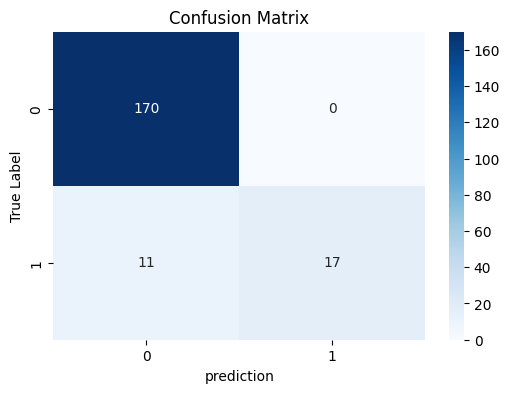

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('prediction')
plt.ylabel('True Label')
plt.show()

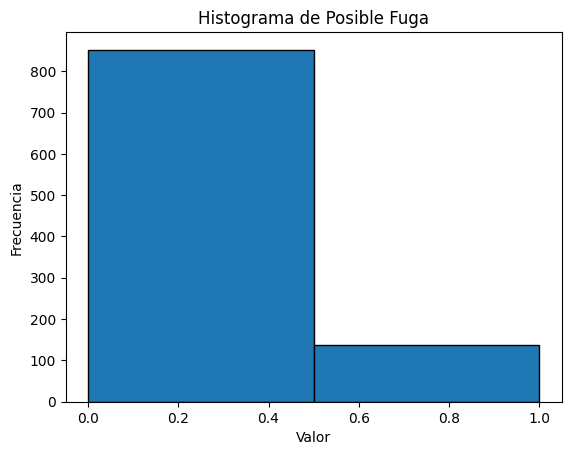

In [ ]:
plt.hist(data['posible_fuga'], bins=2, edgecolor='black')
plt.title('Histograma de Posible Fuga')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


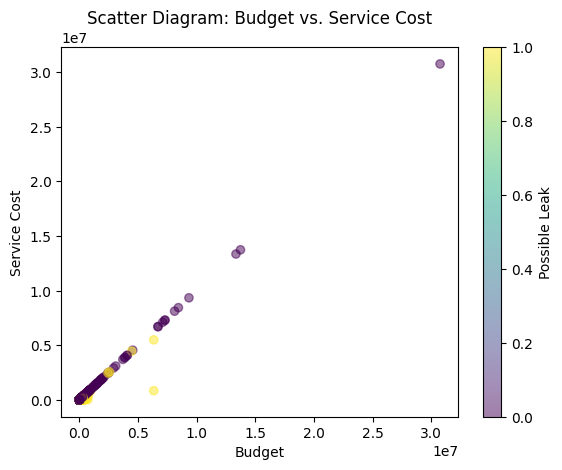

In [ ]:
plt.scatter(data['presupuesto'], data['costo_servicio'], c=data['posible_fuga'], cmap='viridis', alpha=0.5)
plt.title('Scatter Diagram: Budget vs. Service Cost')
plt.xlabel('Budget')
plt.ylabel('Service Cost')
plt.colorbar(label='Possible Leak')
plt.show()


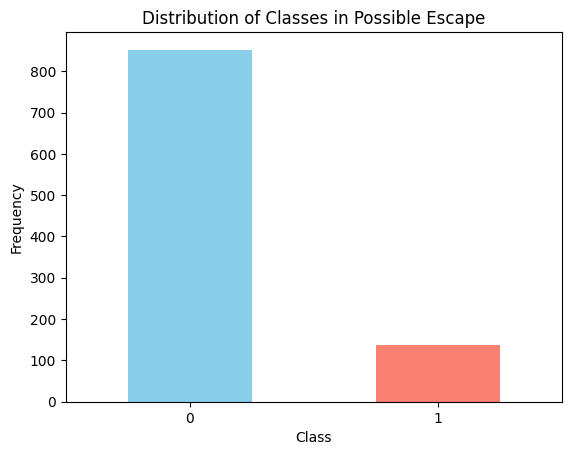

In [ ]:
data['posible_fuga'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Classes in Possible Escape')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


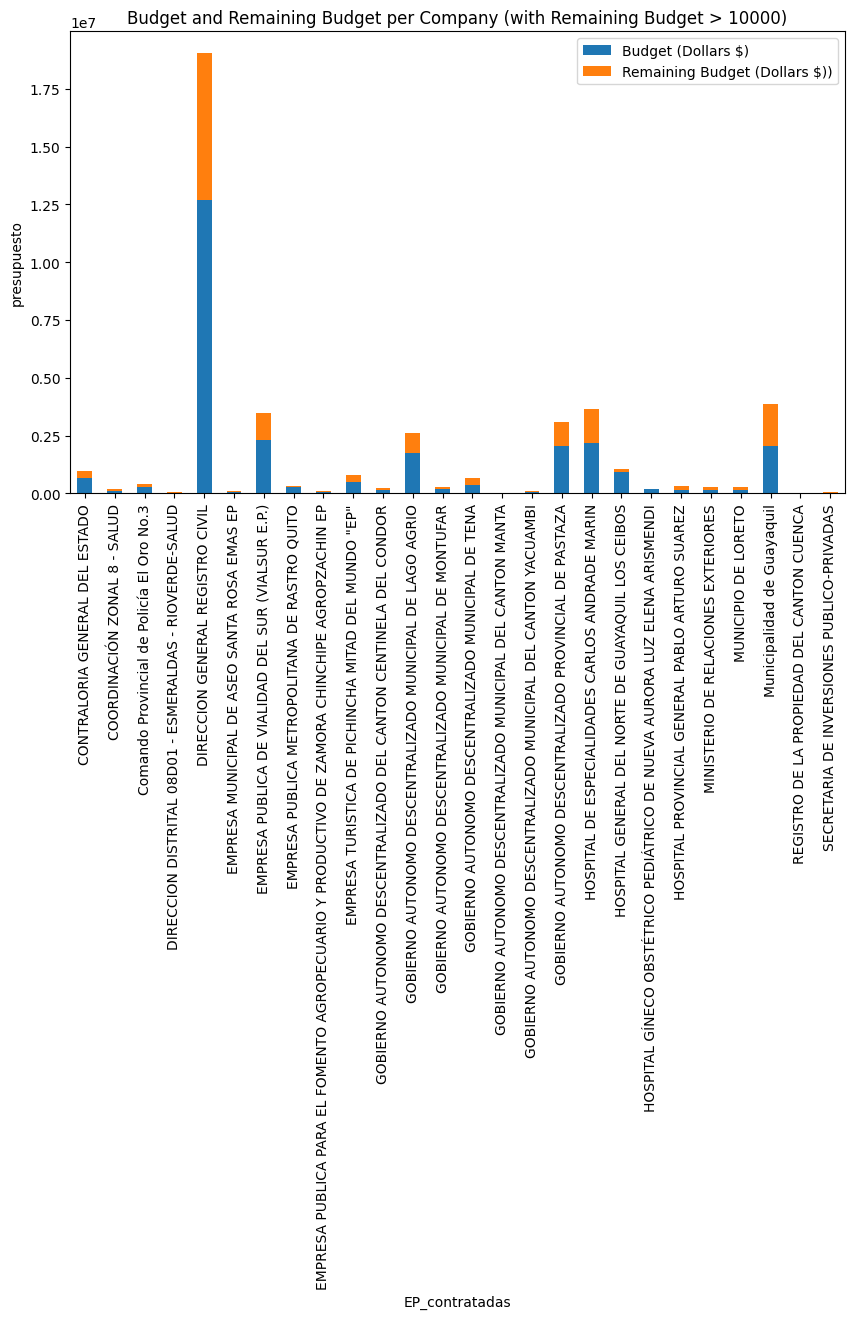

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Filtra las empresas con 'presupuesto_restante' mayor que 0
data_filtered = data[data['cantidad_fuga'] > 10000]

data_grouped = data_filtered.groupby('EP_contratadas')[['presupuesto', 'cantidad_fuga']].sum()

data_grouped.plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('EP_contratadas')
plt.ylabel('presupuesto')
plt.title('Budget and Remaining Budget per Company (with Remaining Budget > 10000)')
plt.legend(['Budget (Dollars $)', 'Remaining Budget (Dollars $))'])
plt.show()



#RandomForestClassifier

In [ ]:

data = pd.read_excel('/content/datos_finales.xlsx')

data['posible_fuga'] = np.where(data['presupuesto'] > data['costo_servicio'], 1, 0)

features = ['EP_contratadas', 'presupuesto', 'nombre_EMOfertante', 'servicio_contratado', 'costo_servicio', 'cantidad_fuga']

data_encoded = pd.get_dummies(data[features])

X_train, X_test, y_train, y_test = train_test_split(data_encoded, data['posible_fuga'], test_size=0.2, random_state=42, stratify=data['posible_fuga'])

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Test Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Test Accuracy: 0.89

Confusion Matrix:
[[170   0]
 [ 21   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       170
           1       1.00      0.25      0.40        28

    accuracy                           0.89       198
   macro avg       0.95      0.62      0.67       198
weighted avg       0.91      0.89      0.87       198



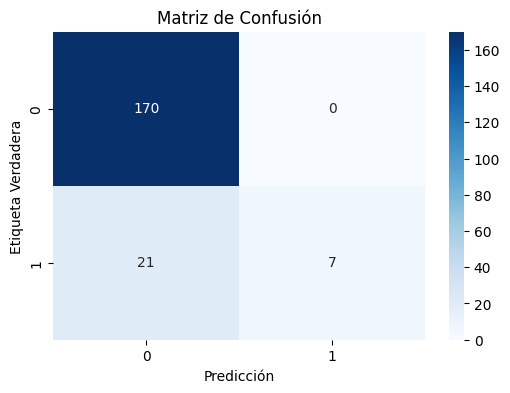

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

#Neural Network

In [ ]:

data = pd.read_excel('/content/datos_finales.xlsx')

data['posible_fuga'] = np.where(data['presupuesto'] > data['costo_servicio'], 1, 0)

features = ['EP_contratadas', 'presupuesto', 'nombre_EMOfertante', 'servicio_contratado', 'costo_servicio', 'cantidad_fuga']

data_encoded = pd.get_dummies(data[features])

X_train, X_test, y_train, y_test = train_test_split(data_encoded, data['posible_fuga'], test_size=0.2, random_state=42, stratify=data['posible_fuga'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Test Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Epoch 1/20
20/20 [==============================] - 1s 16ms/step - loss: 0.4554 - accuracy: 0.8246 - val_loss: 0.4851 - val_accuracy: 0.8302
Epoch 2/20
20/20 [==============================] - 0s 6ms/step - loss: 0.2871 - accuracy: 0.8720 - val_loss: 0.4265 - val_accuracy: 0.8365
Epoch 3/20
20/20 [==============================] - 0s 6ms/step - loss: 0.1847 - accuracy: 0.9100 - val_loss: 0.3965 - val_accuracy: 0.8553
Epoch 4/20
20/20 [==============================] - 0s 6ms/step - loss: 0.1206 - accuracy: 0.9526 - val_loss: 0.3812 - val_accuracy: 0.8679
Epoch 5/20
20/20 [==============================] - 0s 6ms/step - loss: 0.0741 - accuracy: 0.9921 - val_loss: 0.3711 - val_accuracy: 0.8553
Epoch 6/20
20/20 [==============================] - 0s 6ms/step - loss: 0.0460 - accuracy: 0.9984 - val_loss: 0.3663 - val_accuracy: 0.8553
Epoch 7/20
20/20 [==============================] - 0s 6ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.3647 - val_accuracy: 0.8365
Epoch 8/20
20/20 [=

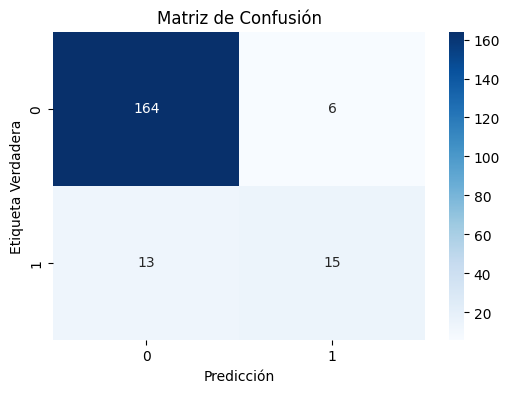

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()